In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')


%matplotlib inline

# Importing Training dataset

In [32]:
df_train=pd.read_csv('E:\ANALYTICS\DATA SETS\Give me some Loan\cs-training.csv')
df_test=pd.read_csv('E:\ANALYTICS\DATA SETS\Give me some Loan\cs-test.csv')

In [3]:
df_train.head(10)
df_test.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
5,6,NaN,0.509791,63,0,0.342429,4140.0,4,0,0,0,1.0
6,7,NaN,0.587778,50,0,1048.000000,0.0,5,0,0,0,3.0
7,8,NaN,0.046149,79,1,0.369170,3301.0,8,0,1,0,1.0
8,9,NaN,0.013527,68,0,2024.000000,NaN,4,0,1,0,0.0
9,10,NaN,1.000000,23,98,0.000000,0.0,0,98,0,98,0.0


In [4]:
print('Shape Train data :',df_train.shape)

('Shape Train data :', (150000, 12))


In [33]:

del df_train['Unnamed: 0']
#uneccessary column


In [34]:
df_train.rename(columns={'NumberOfTime30-59DaysPastDueNotWorse':'NumberOfTime30_59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse':'NumberOfTime60_89DaysPastDueNotWorse'}, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(7)
memory usage: 12.6 MB


In [7]:
#Shrinking data to avoid lag
df_train_shrink=df_train[0:9999]
df_train_shrink.info()
#df_train_shrink=df_train[0:9999]
df_train=df_train_shrink
df_train.info()
#Remove this cell code if you want to use actual data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
SeriousDlqin2yrs                        9999 non-null int64
RevolvingUtilizationOfUnsecuredLines    9999 non-null float64
age                                     9999 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    9999 non-null int64
DebtRatio                               9999 non-null float64
MonthlyIncome                           8025 non-null float64
NumberOfOpenCreditLinesAndLoans         9999 non-null int64
NumberOfTimes90DaysLate                 9999 non-null int64
NumberRealEstateLoansOrLines            9999 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    9999 non-null int64
NumberOfDependents                      9715 non-null float64
dtypes: float64(4), int64(7)
memory usage: 859.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
SeriousDlqin2yrs                        9999 non-null int64
Revolv

MonthlyIncome         19.741974
NumberOfDependents     2.840284
dtype: float64


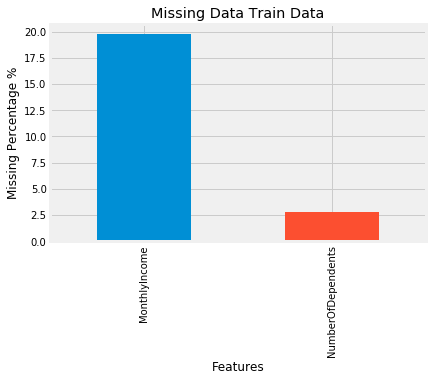

In [8]:
missing_data_train=df_train.isnull().sum()/df_train.shape[0]*100
#print(missing_data_train)
missing_data_train=missing_data_train[missing_data_train>0]
missing_data_train.sort_values(ascending=False,inplace=True)
print(missing_data_train)
missing_data_train.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Missing Percentage %')
plt.title('Missing Data Train Data')
plt.show()

Missing Data
Monthly Income has 20per missing vals
Number of Dependents has 3per missing vals

In [9]:
df_train.isnull()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,True,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,True,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_train.isnull().sum()

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                        0
NumberOfTime30_59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                           1974
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60_89DaysPastDueNotWorse       0
NumberOfDependents                       284
dtype: int64

In [35]:
df_train_nn=df_train.loc[((df_train.SeriousDlqin2yrs.notnull()) &\
                          (df_train.RevolvingUtilizationOfUnsecuredLines.notnull()) &\
                          (df_train.age.notnull()) &\
                          (df_train.NumberOfTime30_59DaysPastDueNotWorse.notnull()) &\
                          (df_train.DebtRatio.notnull()) & (df_train.MonthlyIncome.notnull()) &\
                          (df_train.NumberOfOpenCreditLinesAndLoans.notnull()) &\
                          (df_train.NumberOfTimes90DaysLate.notnull()) &\
                          (df_train.NumberRealEstateLoansOrLines.notnull()) &\
                          (df_train.NumberOfTime60_89DaysPastDueNotWorse.notnull()) &\
                          (df_train.NumberOfDependents.notnull())),:]
print('Shape Train Data after removing NaN :',df_train_nn.shape)
df_train_nn.shape
df_train_nn.head(10)


('Shape Train Data after removing NaN :', (120269, 11))


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0


In [36]:
df_train_nn['NumberOfDependents'] = df_train_nn['NumberOfDependents'].astype('int64')
df_train_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120269 entries, 0 to 149999
Data columns (total 11 columns):
SeriousDlqin2yrs                        120269 non-null int64
RevolvingUtilizationOfUnsecuredLines    120269 non-null float64
age                                     120269 non-null int64
NumberOfTime30_59DaysPastDueNotWorse    120269 non-null int64
DebtRatio                               120269 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         120269 non-null int64
NumberOfTimes90DaysLate                 120269 non-null int64
NumberRealEstateLoansOrLines            120269 non-null int64
NumberOfTime60_89DaysPastDueNotWorse    120269 non-null int64
NumberOfDependents                      120269 non-null int64
dtypes: float64(3), int64(8)
memory usage: 11.0 MB


In [13]:
df_train_nn.head(20)
#Notice 6 row value is missing, similarly those would be missing that dont had some null/NA value

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2
10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0
11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2


In [37]:
#Resetting row numbers in Panda data frame as some rows were deleted as it will cause issues in the loop.
df_train_nn = df_train_nn.reset_index()
df_train_nn.head(10)

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0
5,5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1
6,7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0
7,9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2
8,10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0
9,11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2


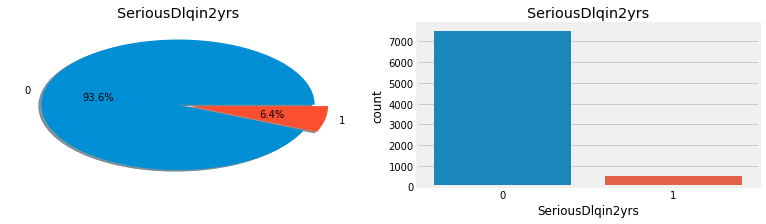

In [15]:
f,ax=plt.subplots(1,2,figsize=(12,3))
df_train_nn['SeriousDlqin2yrs'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('SeriousDlqin2yrs')
ax[0].set_ylabel('')
sns.countplot('SeriousDlqin2yrs',data=df_train_nn,ax=ax[1])
ax[1].set_title('SeriousDlqin2yrs')
plt.show()

small number of seriousdlqin2yrs

In [16]:
df_train_nn.describe()

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
count,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000,8025.000000
mean,4982.298692,0.064424,5.944507,51.172710,0.386417,27.290011,6605.644735,8.693333,0.216075,1.048349,0.189782,0.836262
std,2884.431666,0.245521,178.762032,14.339446,3.526688,347.027952,6787.477052,5.097263,3.485358,1.105436,3.470714,1.162991
min,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2498.000000,0.000000,0.035799,40.000000,0.000000,0.142801,3400.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,4978.000000,0.000000,0.186058,51.000000,0.000000,0.296686,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,7470.000000,0.000000,0.584424,61.000000,0.000000,0.484566,8200.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,9998.000000,1.000000,9340.000000,98.000000,98.000000,15466.000000,208333.000000,46.000000,98.000000,17.000000,98.000000,20.000000


In [17]:
df_train_nn.head(20)

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0
5,5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1
6,7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0
7,9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2
8,10,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0
9,11,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2


# Univariate Analysis

In [18]:
df_num=df_train_nn.select_dtypes(['float64'])
df_cat=df_train_nn.select_dtypes(['int64'])
print('Continious Variables :',df_num.columns.values,'   ', len(df_num.columns.values))
print('Categorical Variables :',df_cat.columns.values,'',len(df_cat.columns.values))

('Continious Variables :', array(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome'], dtype=object), '   ', 3)
('Categorical Variables :', array(['index', 'SeriousDlqin2yrs', 'age',
       'NumberOfTime30_59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfTime60_89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object), '', 9)


3
('RevolvingUtilizationOfUnsecuredLines', 0, 'r')
[0, 1, 2]
('DebtRatio', 1, 'g')
[0, 1, 2]
('MonthlyIncome', 2, 'b')
[0, 1, 2]


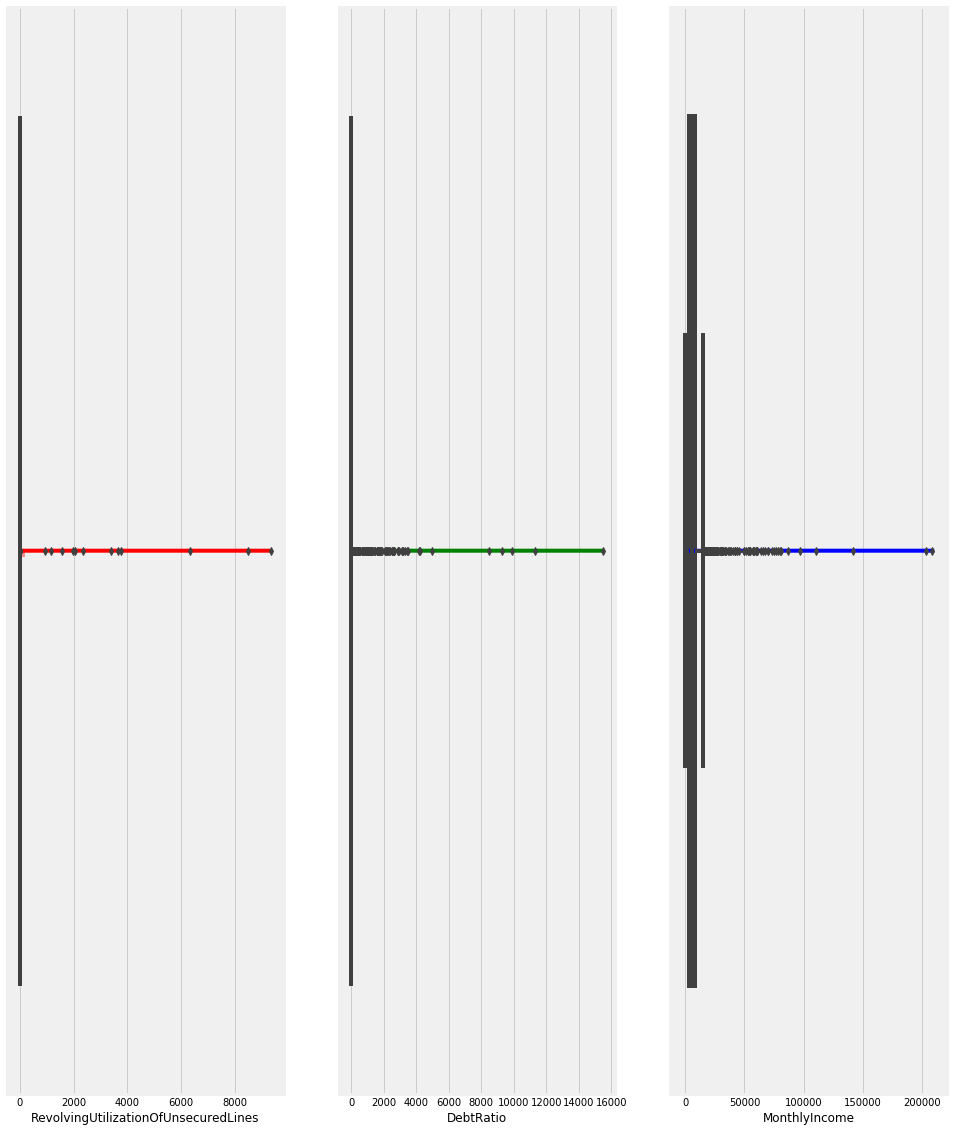

In [19]:
columns = df_num.columns
length  = len(columns)
colors  = ["r","g","b"] 
print(length)
plt.figure(figsize=(15,20))
for i,j,k in itertools.izip_longest(columns,range(length),colors):
    print(i,j,k)
    print(range(length))
    plt.subplot(length/3,length,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_num[i], color=k)
    sns.boxplot(df_num[i])
    #plt.title(i)
    #plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    #plt.legend(loc="upper right")

In [20]:
#Observation - some outliers exist in above plot. NEed to remove them.
sum=0
for i in range(df_train_nn['SeriousDlqin2yrs'].count()):
    if df_train_nn.RevolvingUtilizationOfUnsecuredLines[i]>1.5:
        sum=sum+1
        #print(df_train_nn.RevolvingUtilizationOfUnsecuredLines[i])
print(sum)     #   print(df_train_nn.RevolvingUtilizationOfUnsecuredLines[i])

su=0
for i in range(df_train_nn['SeriousDlqin2yrs'].count()):
    if df_train_nn.DebtRatio[i]>2:
        su=su+1
        #print(df_train_nn.RevolvingUtilizationOfUnsecuredLines[i])
print(su) 

s=0
for i in range(df_train_nn['SeriousDlqin2yrs'].count()):
    if df_train_nn.MonthlyIncome[i]>25000.0000:
        s=s+1
        #print(df_train_nn.RevolvingUtilizationOfUnsecuredLines[i])
print(s) 

#As you can see, removing these outliers will give a better shape to the graphs for our analysis.

25
205
84


In [40]:
#Removing outlier rows for floating type data

df_train_nn_new=df_train_nn

df_train_nn_new=df_train_nn_new[df_train_nn_new.RevolvingUtilizationOfUnsecuredLines < 1.5]
df_train_nn_new=df_train_nn_new[df_train_nn_new.DebtRatio < 2]
df_train_nn_new=df_train_nn_new[df_train_nn_new.MonthlyIncome < 25000]

df_train_nn=df_train_nn_new
df_train_nn.shape
#df_train_nn.shape
#for i in range(df_train_nn_new['SeriousDlqin2yrs'].count()):
 #   if df_train_nn_new.RevolvingUtilizationOfUnsecuredLines[i]>2:
        #print(i)
        #sum=sum+1

#print(df_train_nn_new[i])
        #df_train_nn_new.drop([i])

    #for i in range(df_train_nn_new['SeriousDlqin2yrs'].count()):
 #   if df_train_nn_new.RevolvingUtilizationOfUnsecuredLines[i]>10:
  #      df_train_nn_new=df_train_nn_new.drop(df_train_nn_new.index[i]) 
        
        #print(df_train_nn.RevolvingUtilizationOfUnsecuredLines[i]) 
#print(df_train_nn_new.shape)

(115214, 12)

In [22]:
df_num=df_train_nn_new.select_dtypes(['float64'])
df_cat=df_train_nn_new.select_dtypes(['int64'])
print('Continious Variables :',df_num.columns.values,'   ', len(df_num.columns.values))
print('Categorical Variables :',df_cat.columns.values,'',len(df_cat.columns.values))

('Continious Variables :', array(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome'], dtype=object), '   ', 3)
('Categorical Variables :', array(['index', 'SeriousDlqin2yrs', 'age',
       'NumberOfTime30_59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfTime60_89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object), '', 9)


3
('RevolvingUtilizationOfUnsecuredLines', 0, 'r')
[0, 1, 2]
('DebtRatio', 1, 'g')
[0, 1, 2]
('MonthlyIncome', 2, 'b')
[0, 1, 2]


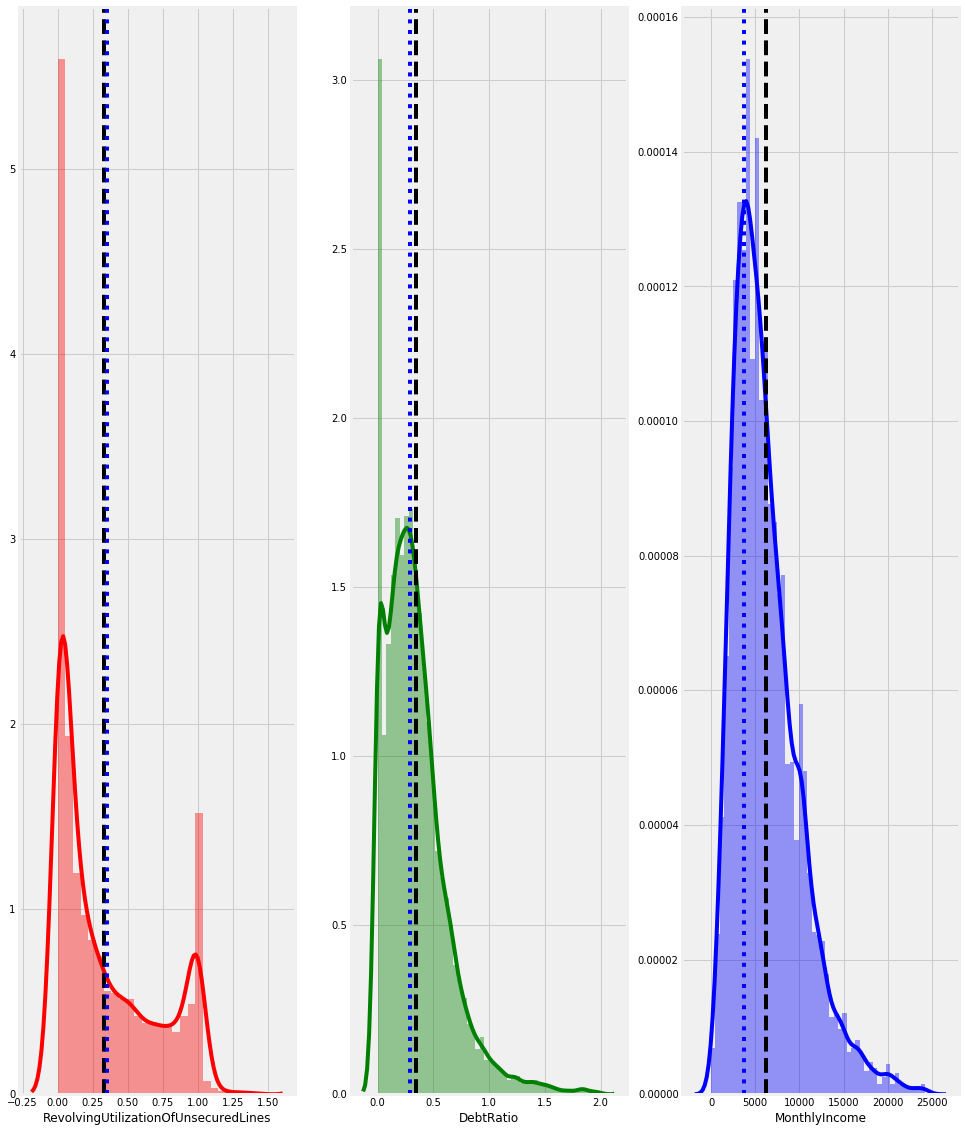

In [23]:
columns = df_num.columns
length  = len(columns)
colors  = ["r","g","b"] 
print(length)
plt.figure(figsize=(15,20))
for i,j,k in itertools.izip_longest(columns,range(length),colors):
    print(i,j,k)
    print(range(length))
    plt.subplot(length/3,length,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_num[i], color=k)
    #sns.boxplot(df_num[i])
    #plt.title(i)
    #plt.subplots_adjust(hspace = .3)
    plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    #plt.legend(loc="upper right")

9
('index', 0, 'r')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('SeriousDlqin2yrs', 1, 'g')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('age', 2, 'b')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('NumberOfTime30_59DaysPastDueNotWorse', 3, 'y')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('NumberOfOpenCreditLinesAndLoans', 4, 'p')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('NumberOfTimes90DaysLate', 5, 'k')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('NumberRealEstateLoansOrLines', 6, 'b')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('NumberOfTime60_89DaysPastDueNotWorse', 7, 'g')
[0, 1, 2, 3, 4, 5, 6, 7, 8]
('NumberOfDependents', 8, 'y')
[0, 1, 2, 3, 4, 5, 6, 7, 8]


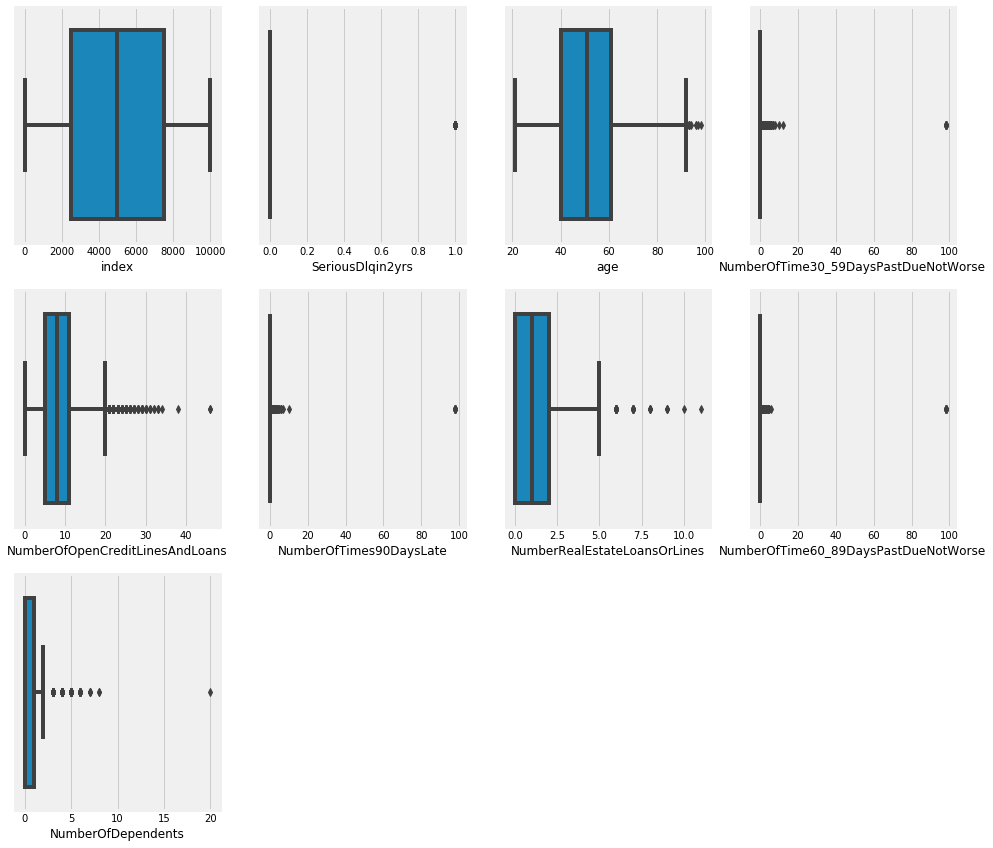

In [24]:
columns = df_cat.columns
length  = len(columns)
colors  = ["r","g","b","y","p","k","b","g","y"] 
print(length)
plt.figure(figsize=(15,20))
for i,j,k in itertools.izip_longest(columns,range(length),colors):
    print(i,j,k)
    print(range(length))
    plt.subplot(length/2,length/2,j+1)
    #print(length/2,length/3,j+1)
    #sns.distplot(df_cat[i], color=k)
    sns.boxplot(df_cat[i])
    #plt.title(i)
    #plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    #plt.legend(loc="upper right")

In [42]:
#30-59, 60-89, >90 --> these columns have values 98%99 that are incomprehensible. Will remoe the rows. 
df_train_nn_new=df_train_nn
#df_cat ('Categorical Variables :', array(['level_0', 'index', 'SeriousDlqin2yrs', 'age',
     #  'NumberOfTime30_59DaysPastDueNotWorse',
      # 'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       #'NumberRealEstateLoansOrLines',
       #'NumberOfTime60_89DaysPastDueNotWorse', 'NumberOfDependents'],
      #dtype=object), '', 10)


df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfTime30_59DaysPastDueNotWorse < 25]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfTime60_89DaysPastDueNotWorse < 25]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfTimes90DaysLate < 25]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberRealEstateLoansOrLines < 6]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfDependents < 6]
df_train_nn_new=df_train_nn_new[df_train_nn_new.NumberOfOpenCreditLinesAndLoans < 50]
df_train_nn=df_train_nn_new
df_train_nn.shape

(114281, 12)

In [26]:
df_num=df_train_nn_new.select_dtypes(['float64'])
df_cat=df_train_nn_new.select_dtypes(['int64'])
print('Continious Variables :',df_num.columns.values,'   ', len(df_num.columns.values))
print('Categorical Variables :',df_cat.columns.values,'',len(df_cat.columns.values))


('Continious Variables :', array(['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio',
       'MonthlyIncome'], dtype=object), '   ', 3)
('Categorical Variables :', array(['index', 'SeriousDlqin2yrs', 'age',
       'NumberOfTime30_59DaysPastDueNotWorse',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines',
       'NumberOfTime60_89DaysPastDueNotWorse', 'NumberOfDependents'],
      dtype=object), '', 9)


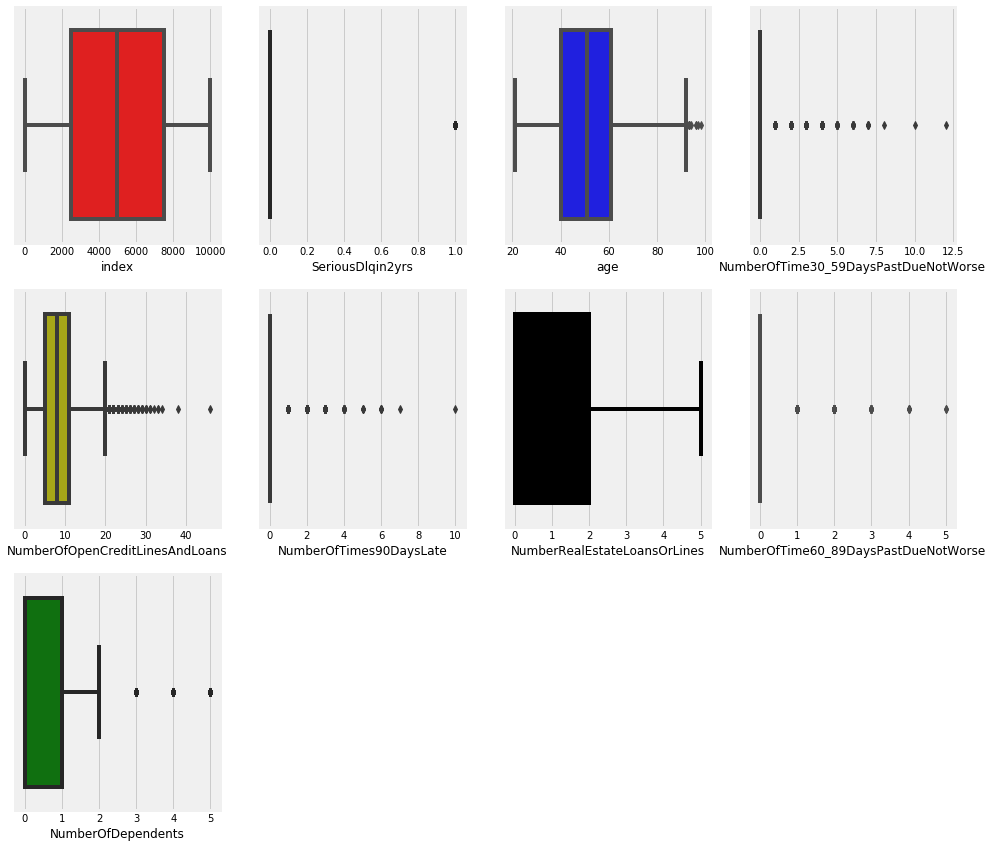

In [27]:
columns = df_cat.columns
length  = len(columns)
colors  = ["r","g","b","m","y","c","k","orange",'g'] 
plt.figure(figsize=(15,20))
for i,j,k in itertools.izip_longest(columns,range(length),colors):
    plt.subplot(length/2,length/2,j+1)
    #print(length/2,length/3,j+1)
    #sns.distplot(df_cat[i], color=k)
    sns.boxplot(df_cat[i], color=k)
    #plt.title(i)
    #plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    #plt.legend(loc="upper right")

12
('index', 0, 'r')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('SeriousDlqin2yrs', 1, 'g')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('RevolvingUtilizationOfUnsecuredLines', 2, 'b')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('age', 3, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('NumberOfTime30_59DaysPastDueNotWorse', 4, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('DebtRatio', 5, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('MonthlyIncome', 6, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('NumberOfOpenCreditLinesAndLoans', 7, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('NumberOfTimes90DaysLate', 8, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('NumberRealEstateLoansOrLines', 9, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('NumberOfTime60_89DaysPastDueNotWorse', 10, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
('NumberOfDependents', 11, None)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


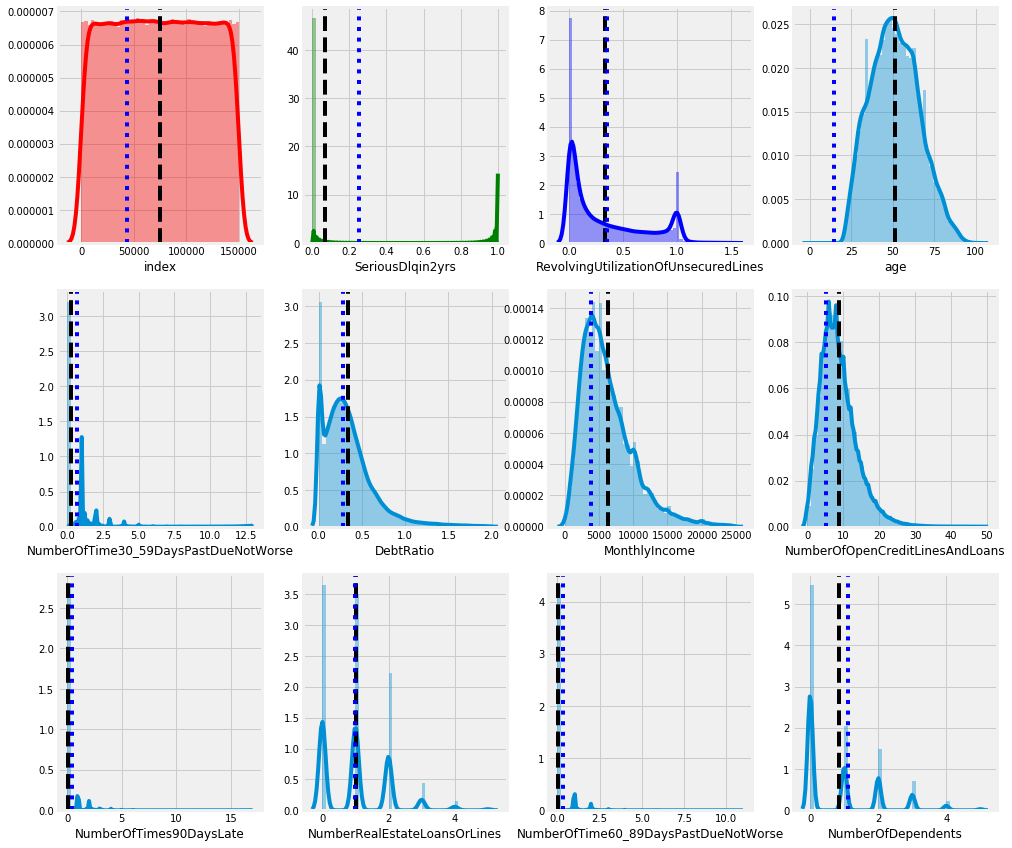

In [43]:
columns = df_train_nn.columns
length  = len(columns)
colors  = ["r","g","b"] 
print(length)
plt.figure(figsize=(15,20))
for i,j,k in itertools.izip_longest(columns,range(length),colors):
    print(i,j,k)
    print(range(length))
    plt.subplot(length/3,length/3,j+1)
    #print(length/2,length/3,j+1)
    sns.distplot(df_train_nn[i], color=k)
    #sns.boxplot(df_num[i])
    #plt.title(i)
    #plt.subplots_adjust(hspace = .3)
    plt.axvline(df_train_nn[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    plt.axvline(df_train_nn[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    #plt.legend(loc="upper right")

In [28]:
#df_train_nn.iloc[0]
df_train_nn[df_train_nn['SeriousDlqin2yrs']== 1]
#df_train_nn['SeriousDlqin2yrs']== 0

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30_59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60_89DaysPastDueNotWorse,NumberOfDependents
11,13,1,0.964673,40,3,0.382965,13700.0,9,3,1,1,2
18,21,1,0.025656,38,0,0.475841,3000.0,7,0,1,0,2
22,25,1,0.392248,50,0,1.595253,4676.0,14,0,3,0,1
46,51,1,0.728150,31,0,0.824725,3000.0,10,0,2,0,1
65,74,1,0.133063,49,1,0.182882,10257.0,9,0,2,0,3
78,88,1,0.734478,45,0,0.591478,4716.0,13,0,2,0,2
140,162,1,1.046279,47,1,1.104301,5416.0,6,0,2,0,1
157,184,1,0.085338,51,0,0.477504,6200.0,11,0,1,0,0
158,185,1,0.000000,25,0,0.152897,2916.0,3,0,0,1,0
159,186,1,0.786485,44,0,0.291710,3883.0,7,2,0,2,1


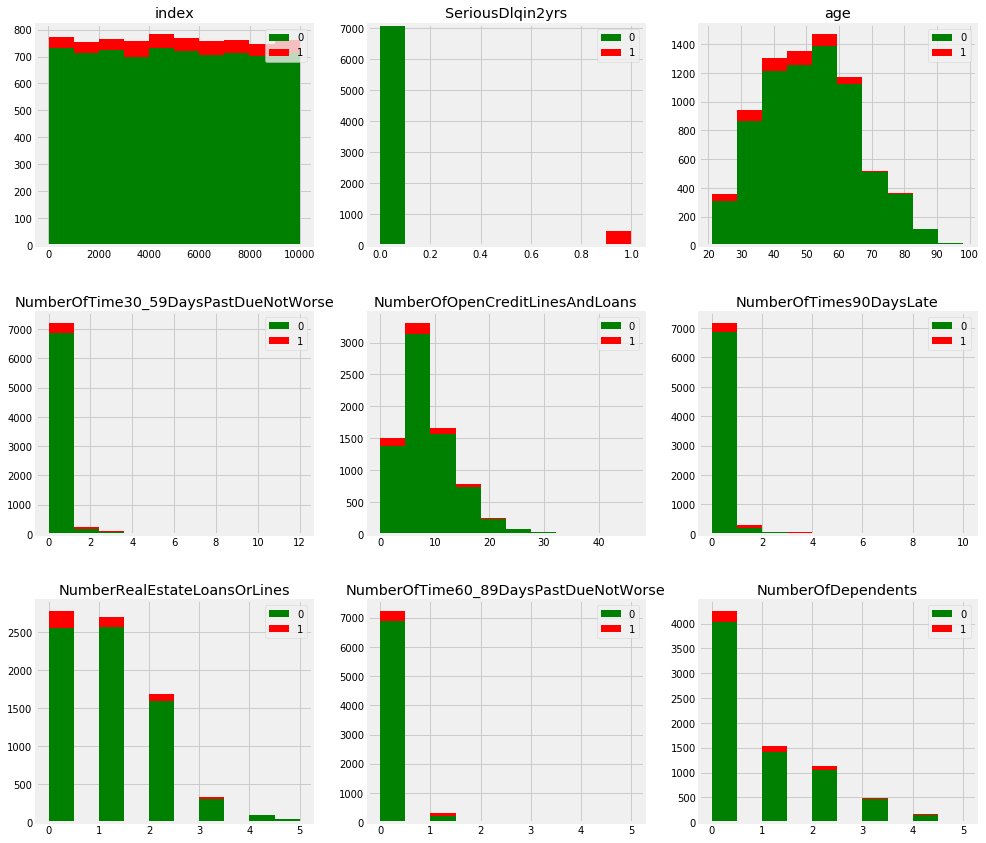

In [29]:
columns = df_cat.columns
length  = len(columns)
#colors  = ["r","g","b","m","y","c","k","orange"] 

plt.figure(figsize=(15,20))
for i,j in itertools.izip_longest(columns,range(length)):
    plt.subplot(length/2,length/3,j+1)
    plt.hist(x = [df_train_nn[df_train_nn['SeriousDlqin2yrs']==0][i], df_train_nn[df_train_nn['SeriousDlqin2yrs']==1][i]], stacked=True, color = ['g','r'],label = ['0','1'])
    plt.title(i)
    plt.subplots_adjust(hspace = .3)
    #plt.axvline(df_num[i].mean(),color = "k",linestyle="dashed",label="MEAN")
    #plt.axvline(df_num[i].std(),color = "b",linestyle="dotted",label="STANDARD DEVIATION")
    plt.legend(loc="upper right")

# BiVariate Analysis

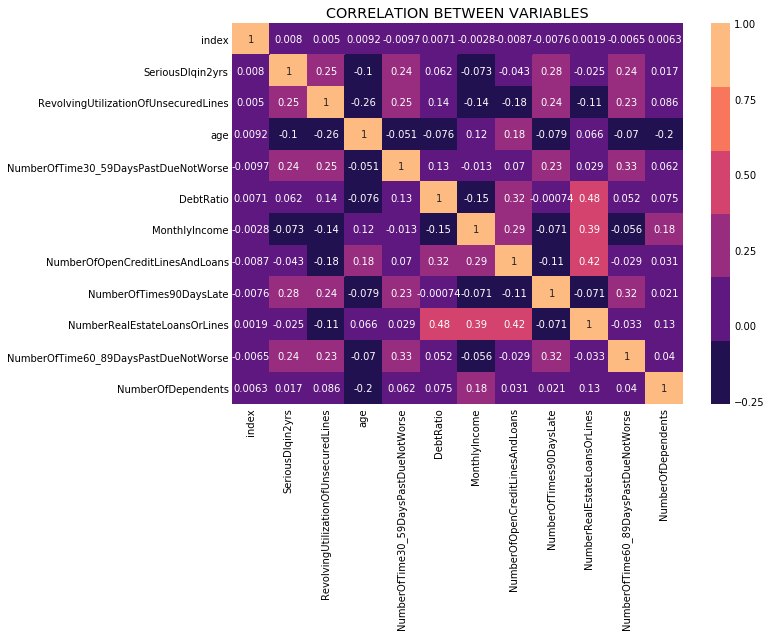

In [30]:
correlation = df_train_nn.corr()
plt.figure(figsize=(9,7))
sns.heatmap(correlation,annot=True,edgecolor="k",cmap=sns.color_palette("magma"))
plt.title("CORRELATION BETWEEN VARIABLES")
plt.show()

In [31]:
#Dont see any strong correlations

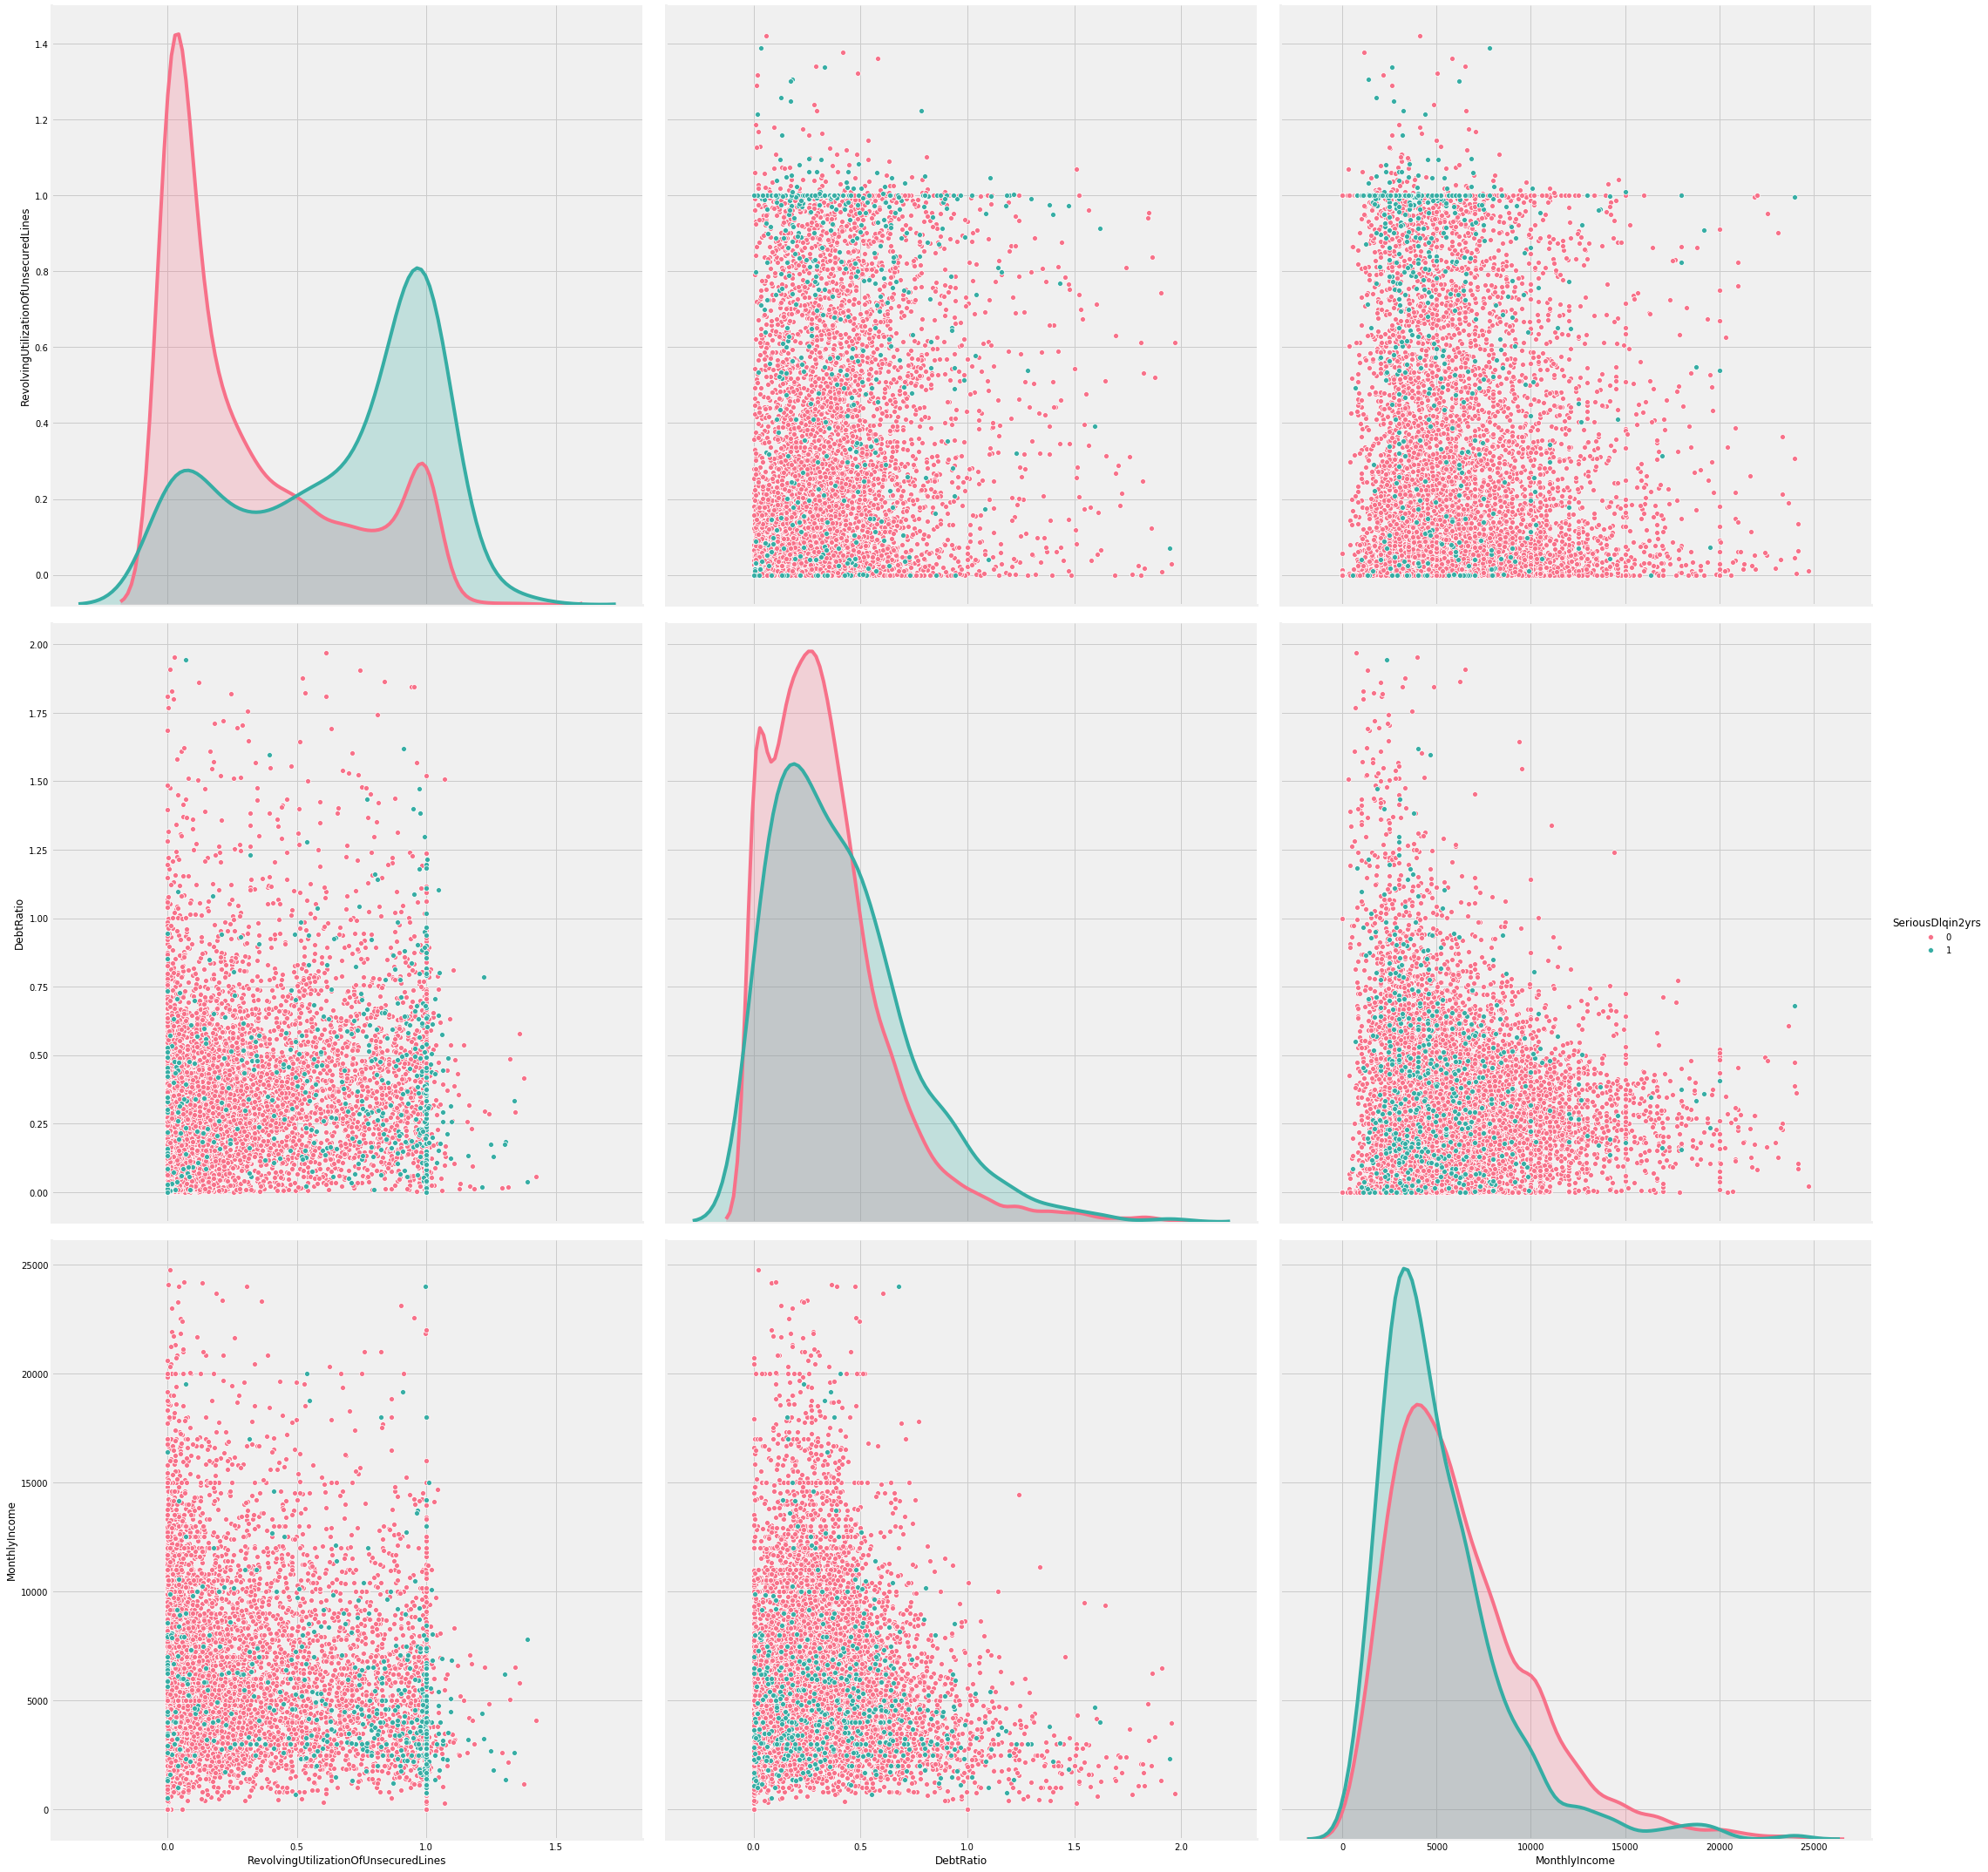

In [48]:
sns.pairplot(df_train_nn,hue='SeriousDlqin2yrs',\
             vars=list(df_num.columns), palette="husl", height=10)
plt.show()